In [138]:
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
df = pd.read_excel('/content/AdventureWorks.xlsx')
df.sample(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
250,2008-06-21,2008-06-28,306,2496,19053,200806215CS586,5.09,9.99,240,0.000,2397.600,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver
671,2008-01-23,2008-02-02,199,384,18816,200801233CS560,348.58,758.00,5,189.500,3600.500,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
289,2009-06-04,2009-06-08,199,2497,18950,200906045CS860,5.09,9.99,720,0.000,7192.800,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White
471,2008-12-06,2008-12-10,307,366,19110,200812063CS656,348.58,758.00,15,1705.500,9664.500,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black
734,2009-12-01,2009-12-07,199,2496,19022,200912015CS937,5.09,9.99,74,147.852,591.408,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver
364,2009-01-06,2009-01-12,307,1203,19112,200901064CS679,324.69,980.00,16,2352.000,13328.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.000,4548.000,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
280,2009-07-18,2009-07-31,307,2497,19129,200907185CS719,5.09,9.99,1152,0.000,11508.480,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White
476,2009-11-07,2009-11-17,306,366,19076,200911073CS767,348.58,758.00,12,1819.200,7276.800,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black
464,2009-03-03,2009-03-14,307,1226,19117,200903034CS706,330.99,999.00,11,2197.800,8791.200,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


Procurando se há valores ausentes

In [141]:
df.count()

Data Venda        904
Data Envio        904
ID Loja           904
ID Produto        904
ID Cliente        904
No. Venda         904
Custo Unitário    904
Preço Unitário    904
Quantidade        904
Valor Desconto    904
Valor Venda       904
Produto           904
Fabricante        904
Marca             904
Classe            904
Cor               904
dtype: int64

Retirando valores duplicados, se houver

In [195]:
df.drop_duplicates()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo_envio,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,20,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,5,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,6,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,6,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,7,2091.48,2456.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.0,6,419.58,5574.42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,13,1985.94,3588.48
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,11,1948.14,2755.86
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,4,1948.14,2755.86
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.80,4795.20,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,4,1985.94,2809.26


# **Análise**

Analisando um pouco os produtos

In [142]:
df.loc[:, ['Fabricante', 'Produto']]

,Fabricante,Produto
0,Adventure Works,Adventure Works Laptop15.4W M1548 Red
1,Adventure Works,Adventure Works Laptop15.4W M1548 Red
2,Adventure Works,Adventure Works Laptop15.4W M1548 Red
3,Adventure Works,Adventure Works Laptop15.4W M1548 Red
4,Adventure Works,Adventure Works Laptop15.4W M1548 Red
...,...,...
899,"Fabrikam, Inc.",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black
900,"Fabrikam, Inc.",Fabrikam Trendsetter 2/3'' 17mm X100 Black
901,"Fabrikam, Inc.",Fabrikam Trendsetter 2/3'' 17mm X100 Black
902,"Fabrikam, Inc.",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black


Filtrando colunas específicas para detalhadamento

In [143]:
filtro_fabricante = df.Fabricante == 'Adventure Works'

df.loc[filtro_fabricante, ['Produto', 'Classe']]

,Produto,Classe
0,Adventure Works Laptop15.4W M1548 Red,Regular
1,Adventure Works Laptop15.4W M1548 Red,Regular
2,Adventure Works Laptop15.4W M1548 Red,Regular
3,Adventure Works Laptop15.4W M1548 Red,Regular
4,Adventure Works Laptop15.4W M1548 Red,Regular
...,...,...
876,Adventure Works Laptop15.4W M1548 Black,Regular
877,Adventure Works Laptop15.4W M1548 Black,Regular
878,Adventure Works Laptop15.4W M1548 Black,Regular
879,Adventure Works Laptop15.4W M1548 Black,Regular


In [144]:
df.Produto.unique()

array(['Adventure Works Laptop15.4W M1548 Red',
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 White",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Black",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Black",
       'Adventure Works Laptop15.4W M1548 Black',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Headphone Adapter for Contoso Phone E130 White'], dtype=object)

Criando um nova coluna: tempo-envio

In [145]:
df['tempo_envio'] = df['Data Envio'] - df['Data Venda']
df['tempo_envio'].sample(3)

457   13 days
126    5 days
464   11 days
Name: tempo_envio, dtype: timedelta64[ns]

In [146]:
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo_envio
123,2009-07-06,2009-07-10,306,1226,19070,200907064CS757,330.99,999.00,6,0.0000,5994.0000,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,4 days
713,2009-02-22,2009-03-01,306,2496,19063,200902225CS740,5.09,9.99,576,402.7968,5351.4432,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,7 days
85,2009-07-30,2009-08-03,307,1202,19130,200907304CS720,330.66,998.00,6,0.0000,5988.0000,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,4 days


Analisando o tempo médio de envio

In [147]:
df['tempo_envio'] = df['tempo_envio'].dt.days

In [148]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
tempo_envio                int64
dtype: object

In [149]:
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo_envio
501,2008-06-05,2008-06-18,307,1226,19099,200806054CS568,330.99,999.00,7,699.3,6293.7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,13
220,2009-06-10,2009-06-22,306,1203,19068,200906104CS748,324.69,980.00,18,0.0,17640.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,12
293,2008-10-22,2008-11-02,307,2497,19107,200810225CS646,5.09,9.99,240,0.0,2397.6,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,11


In [150]:
tempo_envio_medio = df['tempo_envio'].mean()
tempo_envio_medio

8.543141592920353

Media do tempo de envio por marca

In [151]:
df.groupby('Marca')['tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

Excluindo algumas colunas irrelevantes

In [152]:
df1 = df.drop(['No. Venda', 'Fabricante', 'ID Loja', 'ID Produto', 'ID Cliente'], axis = 1)
df1.sample(4)

,Data Venda,Data Envio,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Marca,Classe,Cor,tempo_envio
492,2009-11-25,2009-11-29,324.69,980.0,24,4704.0,18816.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,Fabrikam,Regular,Black,4
490,2008-11-29,2008-12-03,348.58,758.0,21,2387.7,13530.3,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Regular,Black,4
334,2009-01-13,2009-01-20,348.58,758.0,9,1023.3,5798.7,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Regular,Red,7
821,2008-11-07,2008-11-15,324.69,980.0,6,1176.0,4704.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,Fabrikam,Regular,Grey,8


Criando a coluna 'custo'

In [153]:
df['custo'] = df['Custo Unitário'].mul(df['Quantidade'])
df['custo'].sample(4)

598    2597.52
264    2443.20
284     610.80
24     1983.96
Name: custo, dtype: float64

O custo total será a soma dessa coluna

In [154]:
custo_total = df['custo'].sum()
round(custo_total, 2)

2486783.05

Criando a coluna 'lucro'

In [155]:
df['lucro'] = df['Valor Venda'] - df['custo']
df['lucro'].sample(4)

229    5338.72
868    2229.12
292    1176.00
30     4004.04
Name: lucro, dtype: float64

O lucro total será a soma dessa coluna nova criada

In [156]:
lucro_total = df['lucro'].sum()
round(lucro_total, 2)

3497823.09

In [157]:
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo_envio,custo,lucro
846,2008-02-08,2008-02-19,306,1203,19047,200802084CS529,324.69,980.0,6,411.6,5468.4,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,11,1948.14,3520.26
331,2009-12-29,2010-01-07,307,384,19145,200912293CS735,348.58,758.0,7,795.9,4510.1,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,9,2440.06,2070.04
897,2009-06-12,2009-06-22,307,1226,19126,200906124CS716,330.99,999.0,6,599.4,5394.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,10,1985.94,3408.66


In [158]:
show = df.groupby([df['Valor Venda'], 'Fabricante'])['lucro'].sum()
show

Valor Venda  Fabricante    
159.840      Contoso, Ltd         78.400
332.667      Contoso, Ltd        144.337
351.648      Contoso, Ltd        127.688
479.520      Contoso, Ltd        235.200
591.408      Contoso, Ltd        214.748
                                 ...    
23952.000    Fabrikam, Inc.    16016.160
23976.000    Fabrikam, Inc.    32064.480
25088.000    Fabrikam, Inc.    14697.920
25174.800    Fabrikam, Inc.    15907.080
29400.000    Fabrikam, Inc.    19659.300
Name: lucro, Length: 220, dtype: float64

In [159]:
df.groupby(df['Data Venda'].dt.month)['lucro'].mean()

Data Venda
1     3177.382531
2     3615.747882
3     3760.372333
4     4774.890162
5     4250.780000
6     4459.085009
7     4568.048140
8     3686.680231
9     4290.825474
10    3616.271378
11    3461.602231
12    3168.004072
Name: lucro, dtype: float64

Filtrar meses que obtiveram valores acima da média de lucro

In [160]:
df['mes'] = df['Data Venda'].dt.month
df['ano'] = df['Data Venda'].dt.year

filtro_lucro = df.lucro >= df['lucro'].mean()
show = df.loc[filtro_lucro, ['lucro', 'mes', 'ano']]

df.drop(labels = 'mes', axis = 1, inplace = True)
df.drop(labels = 'ano', axis = 1, inplace = True)

In [161]:
show

,lucro,mes,ano
19,4004.04,5,2008
20,4004.04,5,2008
21,4004.04,6,2008
22,4004.04,6,2008
23,4004.04,6,2008
...,...,...,...
602,4693.68,4,2008
603,4693.68,2,2009
604,4693.68,2,2009
605,4693.68,3,2009


# **Gráficos**

In [164]:
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo_envio,custo,lucro
161,2008-05-30,2008-06-05,306,1202,19052,200805304CS576,330.66,998.00,12,0.0000,11976.0000,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,6,3967.92,8008.0800
891,2008-06-02,2008-06-15,307,1226,19099,200806024CS568,330.99,999.00,6,599.4000,5394.6000,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,13,1985.94,3408.6600
713,2009-02-22,2009-03-01,306,2496,19063,200902225CS740,5.09,9.99,576,402.7968,5351.4432,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,7,2931.84,2419.6032


In [165]:
import seaborn as sns
import numpy as np
import plotly.express as px

In [166]:
np.unique(df['custo'])

array([   81.44,   188.33,   223.96,   244.32,   376.66,   488.64,
         549.72,   610.8 ,   697.16,   732.96,   794.04,   977.28,
        1099.44,  1221.6 ,  1298.76,  1322.64,  1323.96,  1343.76,
        1394.32,  1465.92,  1588.08,  1623.45,  1653.3 ,  1654.95,
        1742.9 ,  1948.14,  1954.56,  1983.96,  1985.94,  2091.48,
        2178.52,  2198.88,  2272.83,  2314.62,  2316.93,  2382.12,
        2440.06,  2443.2 ,  2597.52,  2645.28,  2647.92,  2788.64,
        2922.21,  2931.84,  2975.94,  2978.91,  3137.22,  3176.16,
        3246.9 ,  3306.6 ,  3309.9 ,  3485.8 ,  3571.59,  3637.26,
        3640.89,  3664.8 ,  3834.38,  3896.28,  3967.92,  3971.88,
        4182.96,  4220.97,  4298.58,  4302.87,  4397.76,  4531.54,
        4545.66,  4629.24,  4764.24,  4870.35,  4880.12,  4959.9 ,
        4964.85,  5195.04,  5228.7 ,  5290.56,  5295.84,  5519.73,
        5577.28,  5621.22,  5626.83,  5844.42,  5863.68,  5925.86,
        5951.88,  5957.82,  5970.57,  6274.44,  6613.2 ,  6623

In [167]:
np.unique(df['custo'], return_counts=True)

(array([   81.44,   188.33,   223.96,   244.32,   376.66,   488.64,
          549.72,   610.8 ,   697.16,   732.96,   794.04,   977.28,
         1099.44,  1221.6 ,  1298.76,  1322.64,  1323.96,  1343.76,
         1394.32,  1465.92,  1588.08,  1623.45,  1653.3 ,  1654.95,
         1742.9 ,  1948.14,  1954.56,  1983.96,  1985.94,  2091.48,
         2178.52,  2198.88,  2272.83,  2314.62,  2316.93,  2382.12,
         2440.06,  2443.2 ,  2597.52,  2645.28,  2647.92,  2788.64,
         2922.21,  2931.84,  2975.94,  2978.91,  3137.22,  3176.16,
         3246.9 ,  3306.6 ,  3309.9 ,  3485.8 ,  3571.59,  3637.26,
         3640.89,  3664.8 ,  3834.38,  3896.28,  3967.92,  3971.88,
         4182.96,  4220.97,  4298.58,  4302.87,  4397.76,  4531.54,
         4545.66,  4629.24,  4764.24,  4870.35,  4880.12,  4959.9 ,
         4964.85,  5195.04,  5228.7 ,  5290.56,  5295.84,  5519.73,
         5577.28,  5621.22,  5626.83,  5844.42,  5863.68,  5925.86,
         5951.88,  5957.82,  5970.57,  6274.44, 

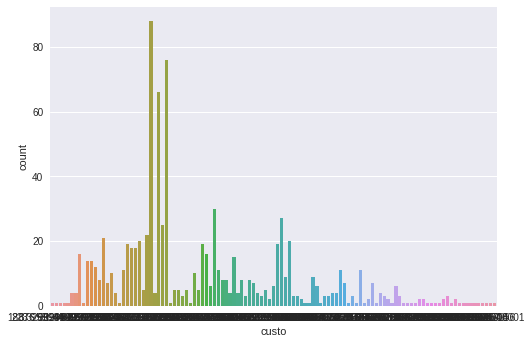

In [168]:
sns.countplot(x = df['custo']);

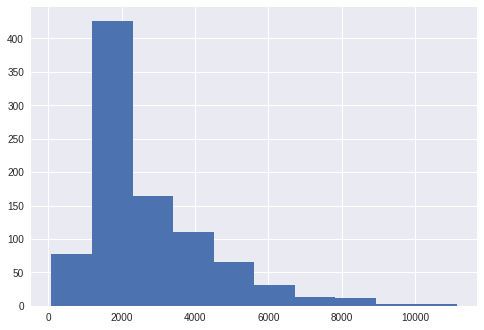

In [169]:
plt.hist(x = df['custo']);

In [170]:
np.unique(df['lucro'], return_counts=True)

(array([   78.4   ,   127.688 ,   144.337 ,   214.748 ,   235.2   ,
          278.592 ,   421.308 ,   452.712 ,   530.634 ,   557.184 ,
          561.744 ,   588.    ,   626.832 ,   743.04  ,   766.128 ,
          835.776 ,   842.616 ,   905.424 ,   950.508 ,  1031.28  ,
         1061.268 ,  1114.368 ,  1123.488 ,  1176.    ,  1209.8016,
         1253.664 ,  1289.1   ,  1358.136 ,  1411.2   ,  1546.92  ,
         1668.1   ,  1685.232 ,  1774.32  ,  1810.848 ,  1837.24  ,
         1857.6   ,  1870.96  ,  1872.84  ,  1901.016 ,  2001.72  ,
         2062.56  ,  2070.04  ,  2097.2   ,  2122.536 ,  2138.16  ,
         2229.12  ,  2246.976 ,  2296.55  ,  2320.38  ,  2335.34  ,
         2338.7   ,  2341.05  ,  2352.    ,  2365.76  ,  2419.6032,
         2456.52  ,  2494.52  ,  2578.2   ,  2600.64  ,  2661.48  ,
         2668.96  ,  2716.272 ,  2755.86  ,  2786.55  ,  2806.44  ,
         2809.26  ,  2822.4   ,  2836.02  ,  2837.7   ,  2840.55  ,
         2850.88  ,  2865.94  ,  3031.55  ,  304

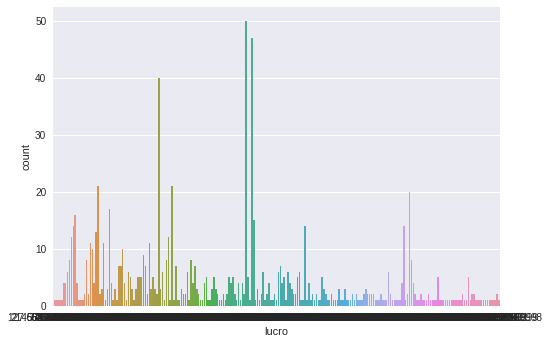

In [171]:
sns.countplot(x = df['lucro']);

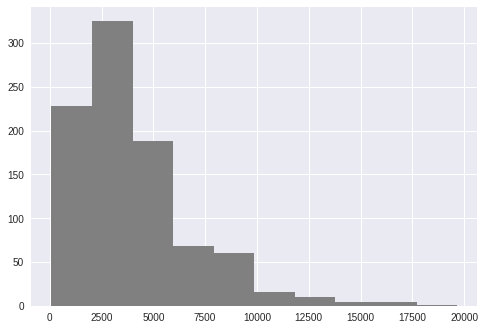

In [172]:
plt.hist(x = df['lucro'], color = 'grey');

In [173]:
plot = px.histogram(x = df['lucro'])
plot.show()

In [174]:
plot = px.scatter_matrix(df, dimensions= ['custo', 'lucro'], color = 'ID Produto')
plot.show()

In [175]:
plot = px.scatter_matrix(df, dimensions = ['tempo_envio'], color = 'Fabricante')
plot.show()

Produtos vendidos por marca

In [176]:
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo_envio,custo,lucro
410,2008-02-05,2008-02-18,199,1178,18819,200802054CS570,330.66,998.0,11,548.9,10429.1,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,13,3637.26,6791.84
97,2008-05-29,2008-06-04,306,1155,19052,200805294CS576,324.69,980.0,6,0.0,5880.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,6,1948.14,3931.86
665,2009-02-12,2009-02-22,307,1203,19116,200902124CS699,324.69,980.0,5,980.0,3920.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,10,1623.45,2296.55


In [177]:
df['Fabricante'].value_counts()

Fabrikam, Inc.     494
Adventure Works    238
Contoso, Ltd       172
Name: Fabricante, dtype: int64

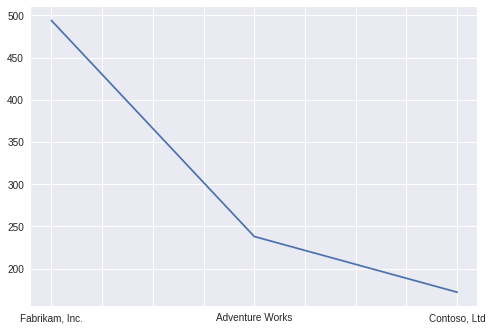

In [178]:
df['Fabricante'].value_counts().plot();

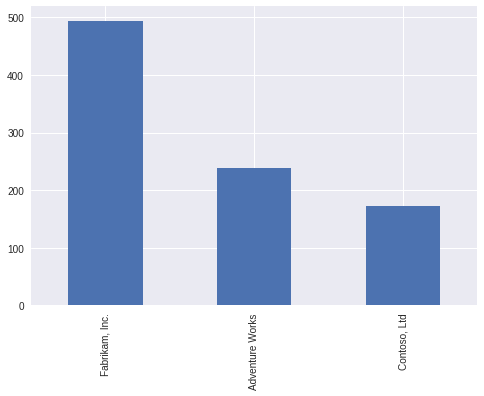

In [179]:
df['Fabricante'].value_counts().plot.bar();

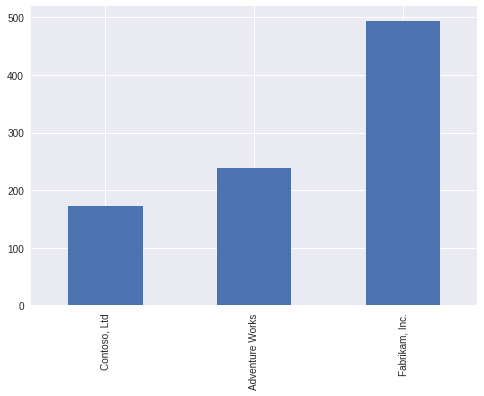

In [194]:
df['Fabricante'].value_counts(ascending = True).plot.bar();

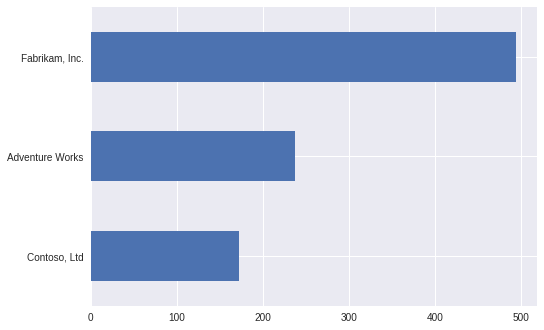

In [181]:
df['Fabricante'].value_counts(ascending = True).plot.barh();

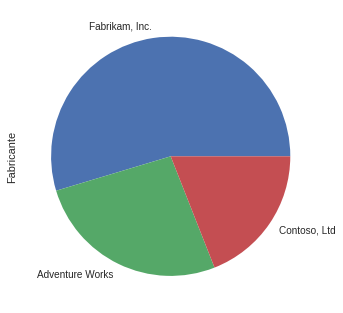

In [182]:
df['Fabricante'].value_counts().plot.pie();

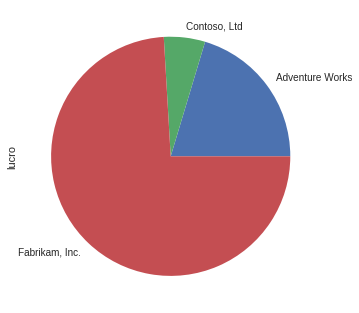

In [183]:
df.groupby('Fabricante')['lucro'].sum().plot.pie();

Pela análise acima, 'Fabrikam' teve o menor número de produtos, porém com a maior porcentagem de lucro

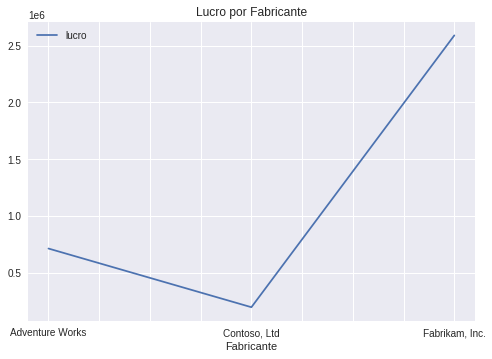

In [184]:
df.groupby('Fabricante')['lucro'].sum().plot(title = 'Lucro por Fabricante')
plt.xlabel = 'Fabricante'
plt.ylabel = 'lucro'
plt.legend();

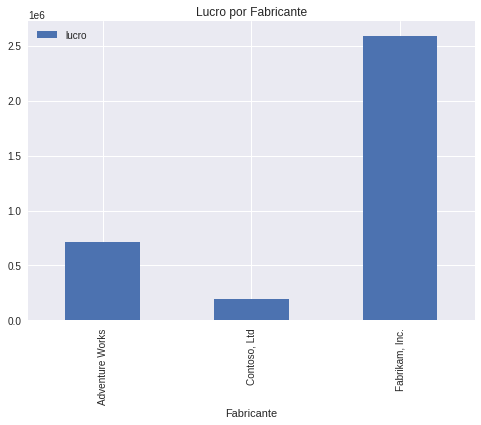

In [185]:
df.groupby('Fabricante')['lucro'].sum().plot.bar(title = 'Lucro por Fabricante')
plt.xlabel = 'Fabricante'
plt.ylabel = 'lucro'
plt.legend();

Mudando o estilo

In [186]:
plt.style.use('ggplot')

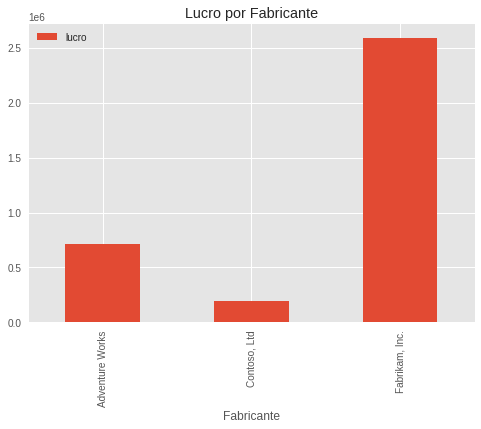

In [187]:
df.groupby('Fabricante')['lucro'].sum().plot.bar(title = 'Lucro por Fabricante')
plt.xlabel = 'Fabricante'
plt.ylabel = 'lucro'
plt.legend();

In [188]:
plt.style.use('seaborn')

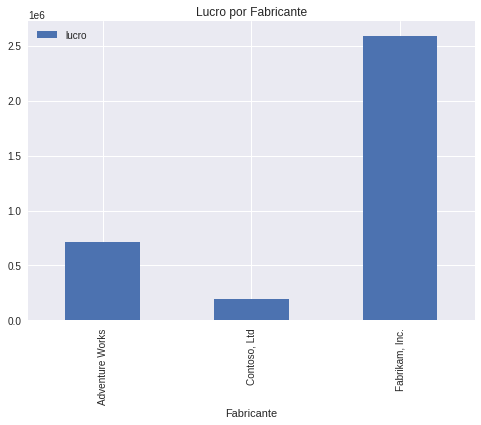

In [189]:
df.groupby(df['Fabricante'])['lucro'].sum().plot.bar(title = 'Lucro por Fabricante')
plt.xlabel = 'Fabricante'
plt.ylabel = 'lucro'
plt.legend();

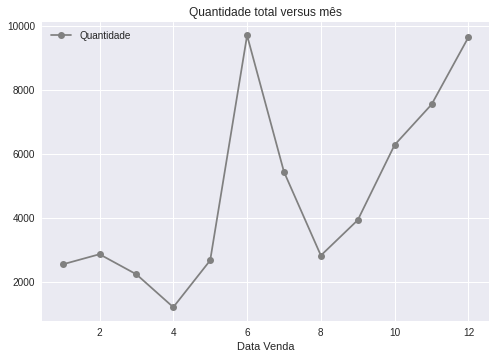

In [190]:
data_quant = df.groupby(df['Data Venda'].dt.month)['Quantidade'].sum()

data_quant.plot(marker = 'o', color = 'grey', title = 'Quantidade total versus mês')
plt.xlabel = 'Mês'
plt.ylabel = 'Quantidade'
plt.legend();

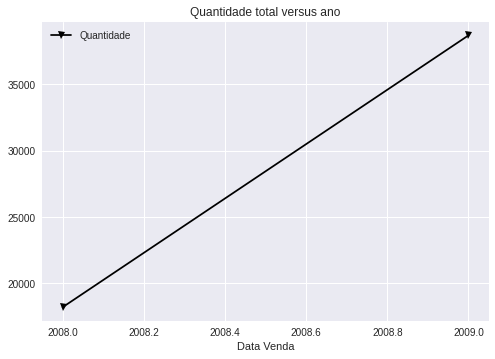

In [191]:
data_quant = df.groupby(df['Data Venda'].dt.year)['Quantidade'].sum()

data_quant.plot(marker = 'v', color = 'black', title = 'Quantidade total versus ano')
plt.xlabel = 'Ano'
plt.ylabel = 'Quantidade'
plt.legend();

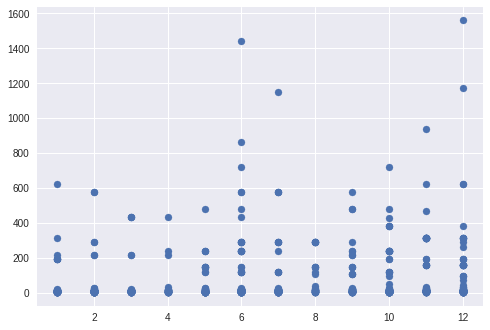

In [192]:
plt.scatter(x = df['Data Venda'].dt.month, y = df['Quantidade'])
plt.show()

Para salvar um gráfico qualquer

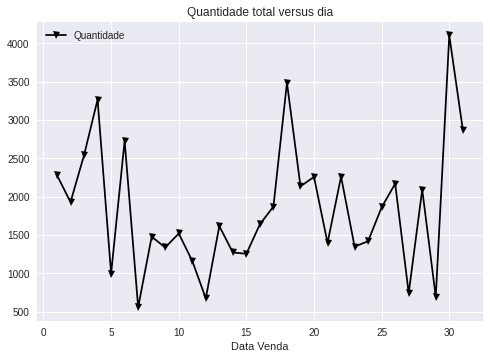

In [193]:
data_quant = df.groupby(df['Data Venda'].dt.day)['Quantidade'].sum()

data_quant.plot(marker = 'v', color = 'black', title = 'Quantidade total versus dia')
plt.xlabel = 'Ano'
plt.ylabel = 'Quantidade'
plt.legend()
plt.savefig('fig_test.png')